In [1]:
import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import operator as op
import pandas as pd

In [2]:
def randomSegmenValue( array, segment, segmentSize, maxSegment ):
    """
    masterOdd[0:masterIntervalSize]
    masterOdd[masterIntervalSize:masterIntervalSize*2]
    masterOdd[masterIntervalSize*2:masterIntervalSize*3]
    masterOdd[masterIntervalSize*3:masterIntervalSize*4]
    masterOdd[masterIntervalSize*4:masterIntervalSize*5]
    masterOdd[masterIntervalSize*5:masterIntervalSize*6]
    masterOdd[masterIntervalSize*6:masterIntervalSize*7]
    masterOdd[masterIntervalSize*7:masterIntervalSize*8]
    masterOdd[masterIntervalSize*8:masterIntervalSize*9]
    masterOdd[masterIntervalSize*9:masterOdd.shape[0]]
    """
    
    if segment == maxSegment:
        segm = array[segmentSize*(segment-1):array.shape[0]]
        select = np.random.randint(0,segm.shape[0],1)
        return int(segm[select])
    else:
        segm = array[segmentSize*(segment-1):segmentSize*segment]
        select = np.random.randint(0,segm.shape[0],1)
        return int(segm[select])
    
   

In [3]:
def rendomVoteGenerator(imgSetSize, voteCount, outFileName):
    IMGSET_SIZE = imgSetSize
    VOTE_COUNT = voteCount
    oddAdd = 0
    evenAdd = 0
    if IMGSET_SIZE % 2 == 0:
        print("EVEN MGSET_SIZE ")
        evenAdd = 1
    else:
        print("ODD MGSET_SIZE ")
        oddAdd = 1

    masterOdd = np.arange(1,IMGSET_SIZE + oddAdd,2)
    slaveEven = np.arange(2,IMGSET_SIZE + evenAdd ,2)
    slaveIntervalSize = int(slaveEven.shape[0]/VOTE_COUNT)
    masterIntervalSize = int(masterOdd.shape[0]/VOTE_COUNT)
    print("masterOdd first  %d " % masterOdd[0])
    print("masterOdd last  %d " % masterOdd[masterOdd.shape[0] - 1])
    print("masterOdd size %d " % masterOdd.shape[0])

    print("slaveEven first  %d " % slaveEven[0])
    print("slaveEven last  %d " % slaveEven[slaveEven.shape[0] - 1])
    print("slaveEven size %d " % slaveEven.shape[0])
    print("slaveIntervalSize %d" % slaveIntervalSize)
    print("masterIntervalSize %d" % masterIntervalSize)


    voteOutMaster = np.zeros((masterOdd.shape[0]*VOTE_COUNT, 3)).astype(int)
    voteOutSlave = np.zeros((slaveEven.shape[0]*VOTE_COUNT, 3)).astype(int)
    voteCheckList = dict()
    
    for i in range(0, masterOdd.shape[0]):
        print('\r%s' % (str(i+1)), end = '\r')
        for j in range(0, VOTE_COUNT):
            noRepeat = True
            while noRepeat:
                rdmSefVal = randomSegmenValue(slaveEven, (j+1), slaveIntervalSize, VOTE_COUNT)
                str1Entry = str(rdmSefVal) + "_" + str(masterOdd[i])
                str2Entry = str(masterOdd[i]) + "-_" + str(rdmSefVal) 
                if str1Entry in voteCheckList or str2Entry in voteCheckList:
                    noRepeat = True
                else:
                    voteOutMaster[i*VOTE_COUNT + j][0] = int(masterOdd[i])
                    voteOutMaster[i*VOTE_COUNT + j][1] = int(rdmSefVal)
                    voteOutMaster[i*VOTE_COUNT + j][2] = 1
                    noRepeat = False
                    voteCheckList[str1Entry] = 1
                    voteCheckList[str2Entry] = 1
                
    for i in range(0, slaveEven.shape[0]):
        print('\r%s' % (str(i+1)), end = '\r')
        for j in range(0, VOTE_COUNT):
            noRepeat = True
            while noRepeat:
                rdmSefVal = randomSegmenValue(masterOdd, (j+1), masterIntervalSize, VOTE_COUNT)
                str1Entry = str(rdmSefVal) + "_" + str(slaveEven[i])
                str2Entry = str(slaveEven[i]) + "-_" + str(rdmSefVal) 
                if str1Entry in voteCheckList or str2Entry in voteCheckList:
                    noRepeat = True
                else:
                    voteOutSlave[i*VOTE_COUNT + j][0] = int(slaveEven[i])
                    voteOutSlave[i*VOTE_COUNT + j][1] = int(rdmSefVal)
                    voteOutSlave[i*VOTE_COUNT + j][2] = 1
                    noRepeat = False
                    voteCheckList[str1Entry] = 1
                    voteCheckList[str2Entry] = 1
                
    voteOut = np.concatenate((voteOutMaster.astype(int), voteOutSlave.astype(int)), axis=0).astype(int)
    print("Vote Array Shape")
    print(voteOut.shape)
    print("voteCheckList Length %d" % len(voteCheckList))
    vtstatistics = np.zeros((IMGSET_SIZE, 1))
    for entry in range(0, voteOut.shape[0]):
        # print("%d %d %d" % (voteOut[entry][0],voteOut[entry][1],voteOut[entry][2]))
        vtstatistics[(voteOut[entry][0])-1][0] = vtstatistics[(voteOut[entry][0])-1][0] + 1
        vtstatistics[(voteOut[entry][1])-1][0] = vtstatistics[(voteOut[entry][1])-1][0] + 1

    print("Min image vote sharing %f" % np.min(vtstatistics))
    print("Max image vote sharing %f" % np.max(vtstatistics))
    print("Mean image vote sharing %f" % np.mean(vtstatistics))
    print("Std image vote sharing %f" % np.std(vtstatistics))
    np.savetxt(outFileName, voteOut.astype(int), fmt='%i', delimiter=",")
    return vtstatistics

ODD MGSET_SIZE 
masterOdd first  1 
masterOdd last  5505 
masterOdd size 2753 
slaveEven first  2 
slaveEven last  5504 
slaveEven size 2752 
slaveIntervalSize 275
masterIntervalSize 275
Vote Array Shape
(55050, 3)
voteCheckList Length 110100
Min image vote sharing 11.000000
Max image vote sharing 37.000000
Mean image vote sharing 20.000000
Std image vote sharing 3.145864


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


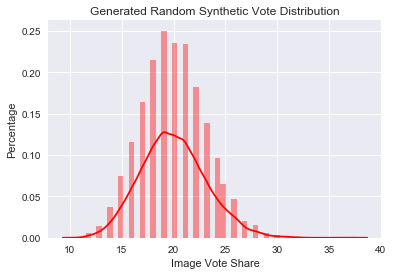

In [4]:
genstatistics = rendomVoteGenerator(5505, 10, "chapineroSRandomVote4Predict_SchemIII.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')
plt.savefig('chapineroSRandomVote4Predict_SchemIII', format='pdf')
plt.show()

<BarContainer object of 5505 artists>

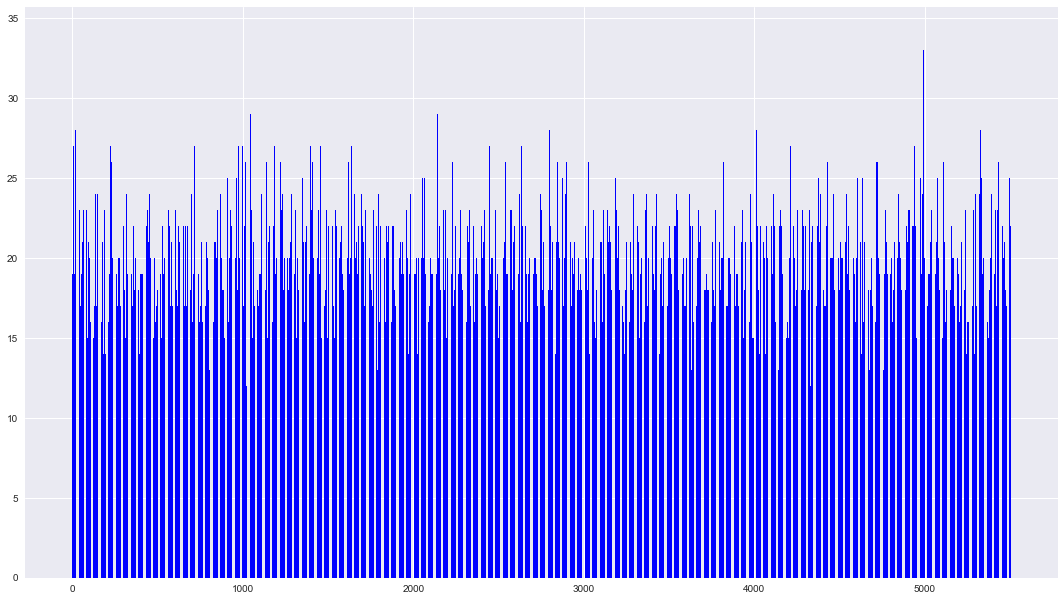

In [5]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

EVEN MGSET_SIZE 
masterOdd first  1 
masterOdd last  9477 
masterOdd size 4739 
slaveEven first  2 
slaveEven last  9478 
slaveEven size 4739 
slaveIntervalSize 473
masterIntervalSize 473
Vote Array Shape
(94780, 3)
voteCheckList Length 189560
Min image vote sharing 11.000000
Max image vote sharing 33.000000
Mean image vote sharing 20.000000
Std image vote sharing 3.146658


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


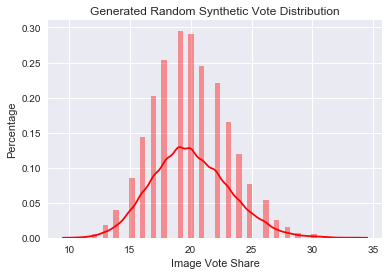

In [5]:
genstatistics = rendomVoteGenerator(9478, 10, "usaquenSRandomVote4Predict_SchemIII.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')
plt.savefig('usaquenSRandomVote4Predict_SchemIII', format='pdf')
plt.show()

<BarContainer object of 9478 artists>

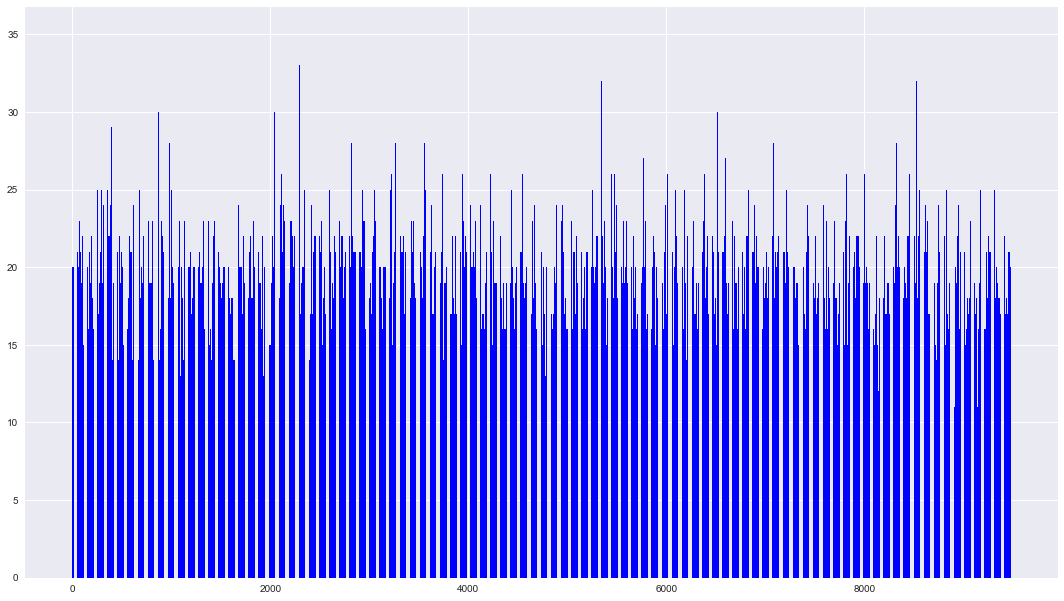

In [7]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

EVEN MGSET_SIZE 
masterOdd first  1 
masterOdd last  3787 
masterOdd size 1894 
slaveEven first  2 
slaveEven last  3788 
slaveEven size 1894 
slaveIntervalSize 189
masterIntervalSize 189
Vote Array Shape
(37880, 3)
voteCheckList Length 75760
Min image vote sharing 11.000000
Max image vote sharing 36.000000
Mean image vote sharing 20.000000
Std image vote sharing 3.113736


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


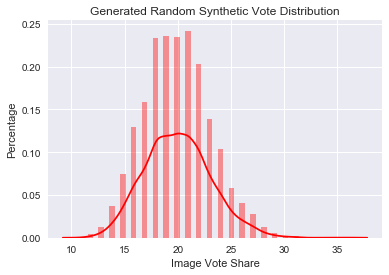

In [6]:
genstatistics = rendomVoteGenerator(3788, 10, "martirSRandomVote4Predict_SchemIII.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')
plt.savefig('martirSRandomVote4Predict_SchemIII', format='pdf')
plt.show()

<BarContainer object of 3788 artists>

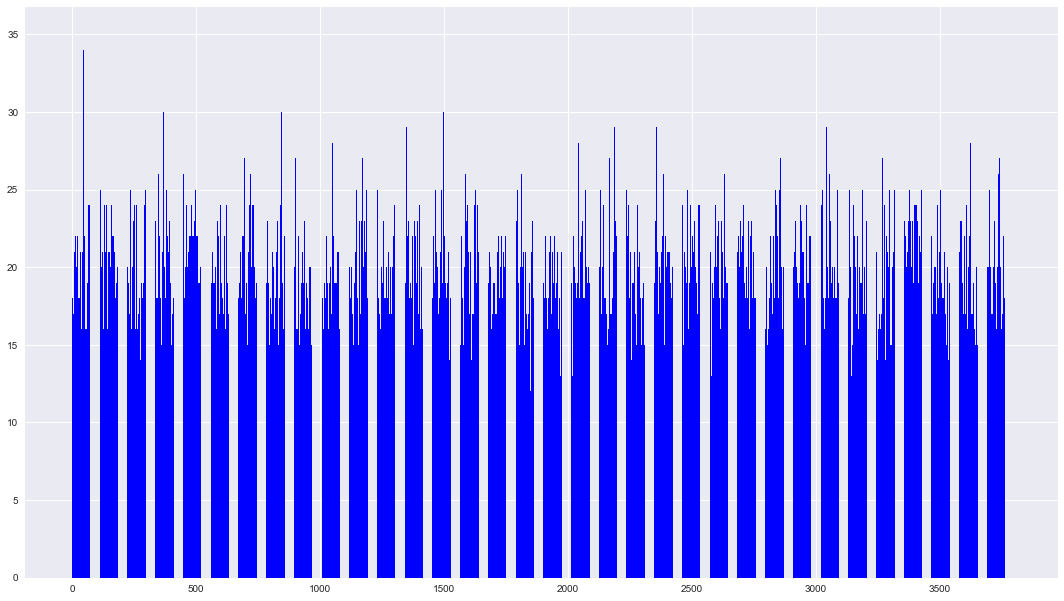

In [9]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

## Actual Vote Set Distribution

In [13]:
actualChapVts = genfromtxt("../descriptorIndexer_Jul_0518.txt", delimiter=',')
print(actualChapVts.shape)
vtstatistics = np.zeros((5505, 1))
for entry in range(0, actualChapVts.shape[0]):
    idxA = int((actualChapVts[entry][0])-1)
    idxB = int((actualChapVts[entry][1])-1)
    vtstatistics[idxA][0] = vtstatistics[idxA][0] + 1
    vtstatistics[idxB][0] = vtstatistics[idxB][0] + 1
    
print("Min image vote sharing %f" % np.min(vtstatistics))
print("Max image vote sharing %f" % np.max(vtstatistics))
print("Mean image vote sharing %f" % np.mean(vtstatistics))
print("Std image vote sharing %f" % np.std(vtstatistics))

(18959, 3)
Min image vote sharing 5.000000
Max image vote sharing 9.000000
Mean image vote sharing 6.887920
Std image vote sharing 0.323987


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


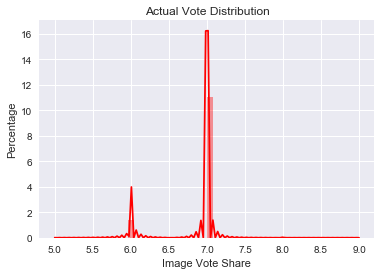

In [29]:
sns.set(color_codes=True)

ax = sns.distplot(vtstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Actual Vote Distribution')
# ax.set(xlim=(6.8, 7.5))
plt.show()

<BarContainer object of 5505 artists>

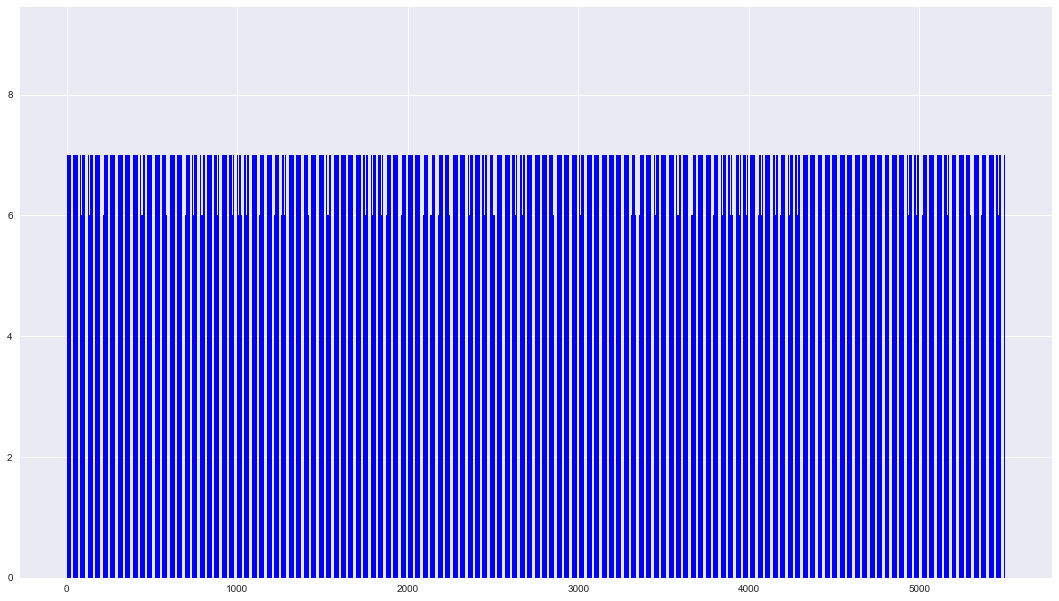

In [15]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(vtstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(vtstatistics), width, color="blue")